In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
import osmnx as ox
import os
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd

In [2]:
# configure the place, network type, trip times, and travel speed
place = {"city": "Singapore", "country": "Singapore"}
network_type = "walk"
trip_times = [5, 10, 15, 20, 25]  # in minutes
# Accoridng to a British Council study, Singaporeans have the fastest walking speed in the world, 
# covering 18 meters in 10.55 seconds
travel_speed = 18/10.55 #m/s
travel_speed = travel_speed*3600/1000 #km/hour
# travel_speed = 4.5  # walking speed in km/hour

# Plot/save walking network

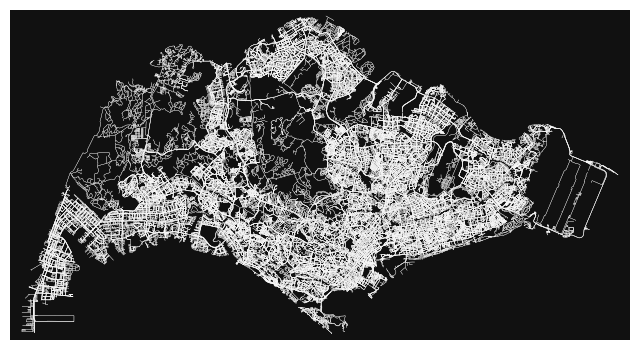

In [ ]:
# # download/model a street network for some city then visualize it
# G = ox.graph_from_place(place, network_type=network_type)
# fig, ax = ox.plot_graph(G)

# # save walking network
save_dir = os.path.join(os.getcwd(),"data")
# if not os.path.exists(save_dir):
#     os.mkdir(save_dir)
filename = "SG_walk_network.graphml"
# # save graph to disk as GraphML file
# ox.save_graphml(G, filepath=os.path.join(save_dir,filename))

# load graph from disk
G = ox.load_graphml(os.path.join(save_dir,filename))
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

# Load planning area shp file

In [132]:
planningArea_shp = gpd.read_file(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_Masterplan\MasterPlan2019_PlanningArea_Fixed.shp")
planningArea_shp

Name                                         Descriptio  \
0    kml_1  <center><table><tr><th colspan='2' align='cent...   
1    kml_4  <center><table><tr><th colspan='2' align='cent...   
2   kml_12  <center><table><tr><th colspan='2' align='cent...   
3   kml_24  <center><table><tr><th colspan='2' align='cent...   
4   kml_27  <center><table><tr><th colspan='2' align='cent...   
5    kml_2  <center><table><tr><th colspan='2' align='cent...   
6    kml_3  <center><table><tr><th colspan='2' align='cent...   
7    kml_5  <center><table><tr><th colspan='2' align='cent...   
8    kml_6  <center><table><tr><th colspan='2' align='cent...   
9    kml_8  <center><table><tr><th colspan='2' align='cent...   
10   kml_9  <center><table><tr><th colspan='2' align='cent...   
11  kml_10  <center><table><tr><th colspan='2' align='cent...   
12  kml_11  <center><table><tr><th colspan='2' align='cent...   
13  kml_13  <center><table><tr><th colspan='2' align='cent...   
14  kml_14  <center><table><tr><th colspan='2' align='cent...   
15  kml_15  <center><table><tr><th colspan='2' align='cent...   
16  kml_16  <center><table><tr><th colspan='2' align='cent...   
17  kml_17  <center><table><tr><th colspan='2' align='cent...   
18  kml_18  <center><table><tr><th colspan='2' align='cent...   
19  kml_19  <center><table><tr><th colspan='2' align='cent...   
20  kml_20  <center><table><tr><th colspan='2' align='cent...   
21  kml_21  <center><table><tr><th colspan='2' align='cent...   
22  kml_22  <center><table><tr><th colspan='2' align='cent...   
23  kml_23  <center><table><tr><th colspan='2' align='cent...   
24  kml_25  <center><table><tr><th colspan='2' align='cent...   
25  kml_26  <center><table><tr><th colspan='2' align='cent...   
26  kml_28  <center><table><tr><th colspan='2' align='cent...   
27  kml_29  <center><table><tr><th colspan='2' align='cent...   
28  kml_30  <center><table><tr><th colspan='2' align='cent...   
29  kml_31  <center><table><tr><th colspan='2' align='cent...   
30  kml_33  <center><table><tr><th colspan='2' align='cent...   
31  kml_34  <center><table><tr><th colspan='2' align='cent...   
32  kml_35  <center><table><tr><th colspan='2' align='cent...   
33  kml_36  <center><table><tr><th colspan='2' align='cent...   
34  kml_37  <center><table><tr><th colspan='2' align='cent...   
35  kml_38  <center><table><tr><th colspan='2' align='cent...   
36  kml_39  <center><table><tr><th colspan='2' align='cent...   
37  kml_40  <center><table><tr><th colspan='2' align='cent...   
38  kml_41  <center><table><tr><th colspan='2' align='cent...   
39  kml_42  <center><table><tr><th colspan='2' align='cent...   
40  kml_43  <center><table><tr><th colspan='2' align='cent...   
41  kml_44  <center><table><tr><th colspan='2' align='cent...   
42  kml_45  <center><table><tr><th colspan='2' align='cent...   
43  kml_46  <center><table><tr><th colspan='2' align='cent...   
44  kml_47  <center><table><tr><th colspan='2' align='cent...   
45  kml_48  <center><table><tr><th colspan='2' align='cent...   
46  kml_49  <center><table><tr><th colspan='2' align='cent...   
47  kml_50  <center><table><tr><th colspan='2' align='cent...   
48  kml_51  <center><table><tr><th colspan='2' align='cent...   
49  kml_52  <center><table><tr><th colspan='2' align='cent...   
50  kml_53  <center><table><tr><th colspan='2' align='cent...   
51  kml_54  <center><table><tr><th colspan='2' align='cent...   
52  kml_55  <center><table><tr><th colspan='2' align='cent...   
53  kml_32  <center><table><tr><th colspan='2' align='cent...   
54   kml_7  <center><table><tr><th colspan='2' align='cent...   

                 PLN_AREA_N PLN_AREA_C CA_IND                 _errors  \
0                     BEDOK         BD      N  Ring self-intersection   
1               BUKIT MERAH         BM      N  Ring self-intersection   
2               JURONG EAST         JE      N  Ring self-intersection   
3     NORTH-EASTERN ISLANDS         NE   None  Ring self-intersection   


<Axes: >

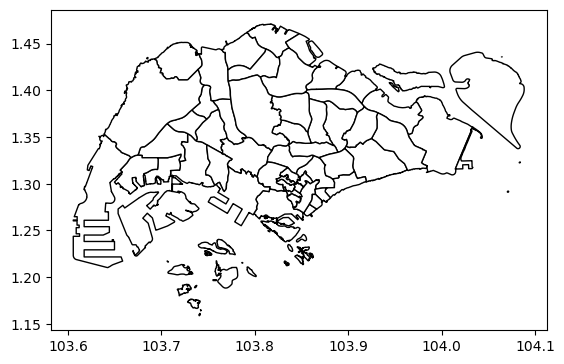

In [133]:
planningArea_shp.plot(fc="white",ec="k")

Check CRS

In [134]:
planningArea_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Load train station exits

PROJCS["SVY21",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",1.36666666666667],PARAMETER["central_meridian",103.833333333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",28001.642],PARAMETER["false_northing",38744.572],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


<Axes: >

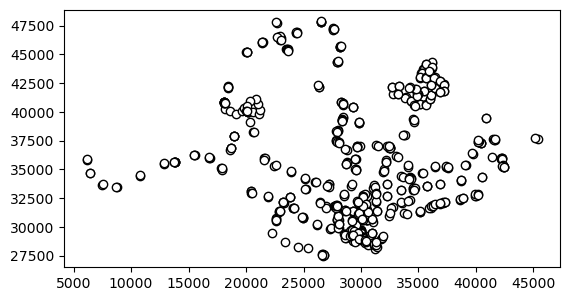

In [183]:
trainStationExit = gpd.read_file(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_LTA\TrainStationExit\Train_Station_Exit_Layer.shp")
print(trainStationExit.crs)
trainStationExit.plot(fc="w",ec="k")

# Load bus stops

<Axes: >

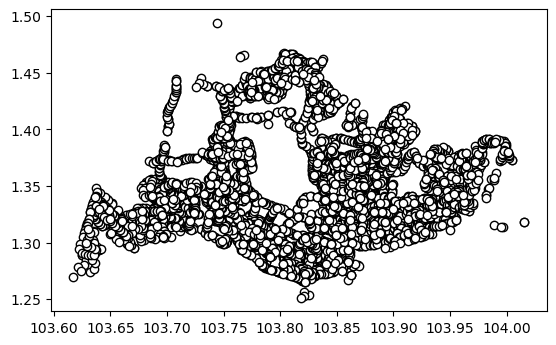

In [184]:
busStops = pd.read_csv(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_LTA\gtfs-feed-lta\stops.txt")
#convert pd to gpd
busStops = gpd.GeoDataFrame(
        busStops, geometry=gpd.points_from_xy(busStops.stop_lon, busStops.stop_lat), crs="EPSG:4326"
    )
busStops.plot(fc="w",ec="k")

## Inspect the walking road network nodes

103.83358042968563 1.303806873111928


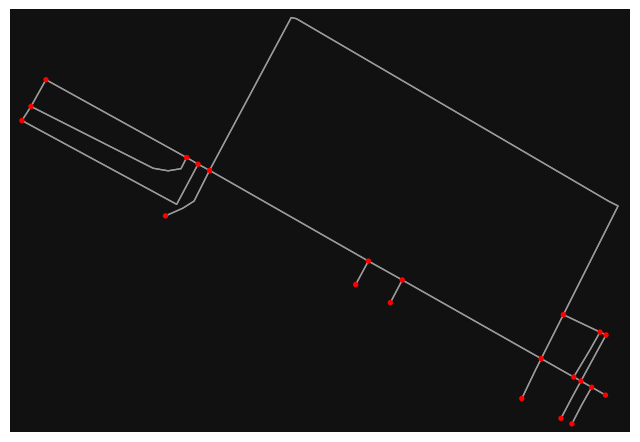

In [27]:
centroid = planningArea_shp.loc[42,"geometry"].centroid
lon, lat = centroid.xy
print(lon[0],lat[0])
G_pa = ox.graph_from_point((lat[0],lon[0]), dist=100,network_type=network_type)
fig, ax = ox.plot_graph(G_pa, node_color="r")

In [188]:
def plot_walking_busstop(G,bus_stops_df, train_exits_df, planning_area_df, ax = None):
    """ 
    Args:
        G (MultiDiGraph): graph of walking network
        train_exits_df (gpd): gpd of train_exits
        bus_stops_df (gpd): gpd of bus stops
        planning_area_df (gpd): planning area polygon
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    # plot planning area
    
    polygon_proj = ox.projection.project_gdf(planning_area_df,# maintains polygon as a gdf instead of a pd.Series
                                            to_latlong=True
                                            )
    polygon_proj.plot(ax=ax,fc="gray", ec="gray")
    
    # plot network

    G_pa_proj = ox.projection.project_graph(G, to_latlong=True)
    
    ox.plot_graph(G_pa_proj,ax=ax,
                node_size=1,node_color="w",node_alpha=0.5,
                edge_color="w",
                show=False,close=False)
    
    # bus stops
    busStop_clip = gpd.clip(bus_stops_df,mask=planning_area_df)
    print(f'Number of bus stops: {busStop_clip.shape[0]}')
    if busStop_clip.shape[0] > 0:
        busStop_proj = ox.projection.project_gdf(busStop_clip,
                                                to_latlong=True
                                                )

        busStop_proj.plot(ax=ax,fc="blue", ec="blue",markersize=5,
                        label="Bus stops"
                        )
        
    # train station exits
    # reproject layer if crs is different
    if train_exits_df.crs != bus_stops_df.crs:
        print(train_exits_df.crs,bus_stops_df.crs)
        train_exits_df = train_exits_df.to_crs(bus_stops_df.crs)
    print(train_exits_df.crs,bus_stops_df.crs)
    trainExits_clip = gpd.clip(train_exits_df,mask=planning_area_df)
    print(f'Number of train exits: {trainExits_clip.shape[0]}')
    if trainExits_clip.shape[0] > 0:
        trainExits_proj = ox.projection.project_gdf(trainExits_clip,
                                                to_latlong=True
                                                )

        trainExits_proj.plot(ax=ax,fc="blue", ec="red",markersize=5,
                        label="Train station exits"
                        )
        
    # set title
    ax.set_title(planning_area_df["PLN_AREA_N"].values[0])
    # if ax is None:
        # add legend
    if ax is None:
        plt.show()
    return

Number of bus stops: 289
PROJCS["SVY21",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",1.36666666666667],PARAMETER["central_meridian",103.833333333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",28001.642],PARAMETER["false_northing",38744.572],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]] EPSG:4326
EPSG:4326 EPSG:4326
Number of train exits: 27


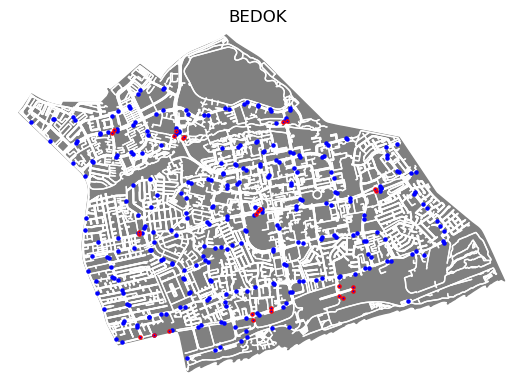

In [189]:
# Exclude the islands
SG_PA = planningArea_shp[~planningArea_shp['PLN_AREA_N'].str.contains("ISLAND")]
SG_PA = SG_PA.reset_index()
fig, ax = plt.subplots()
G_pa = ox.load_graphml(r"data\walk_network_BEDOK.graphml")
plot_walking_busstop(G=G_pa,bus_stops_df=busStops, 
                            train_exits_df=trainStationExit,
                            planning_area_df=SG_PA.iloc[[0],:], 
                            ax = ax)
plt.show()

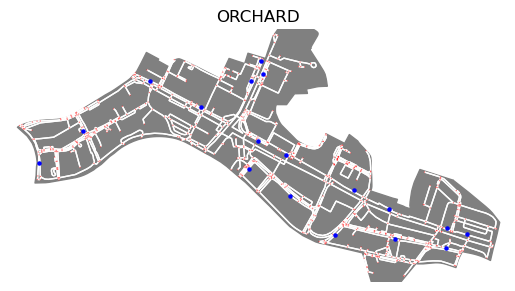

In [128]:
G_pa = ox.graph_from_polygon(planningArea_shp.loc[42,"geometry"], 
                                    network_type=network_type,
                                    )
# plot on ax
plot_walking_busstop(G=G_pa,bus_stops_df=busStops, 
                    planning_area_df=planningArea_shp.iloc[[42],:])

Number of bus stops: 289
PROJCS["SVY21",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",1.36666666666667],PARAMETER["central_meridian",103.833333333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",28001.642],PARAMETER["false_northing",38744.572],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]] EPSG:4326
EPSG:4326 EPSG:4326
Number of train exits: 27
Number of bus stops: 182
PROJCS["SVY21",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",1.36666666666667],PARAMETER["central_meridian",103.833333333333],PARAMETER["scale_factor",1],PARAMETER["false_eastin

C:\Users\hypak\AppData\Local\Temp\ipykernel_20844\869487595.py:34: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  fig.legend(lines, labels, bbox_to_anchor = (0.5,-0.05), loc = 'lower center',ncol = len(lines))


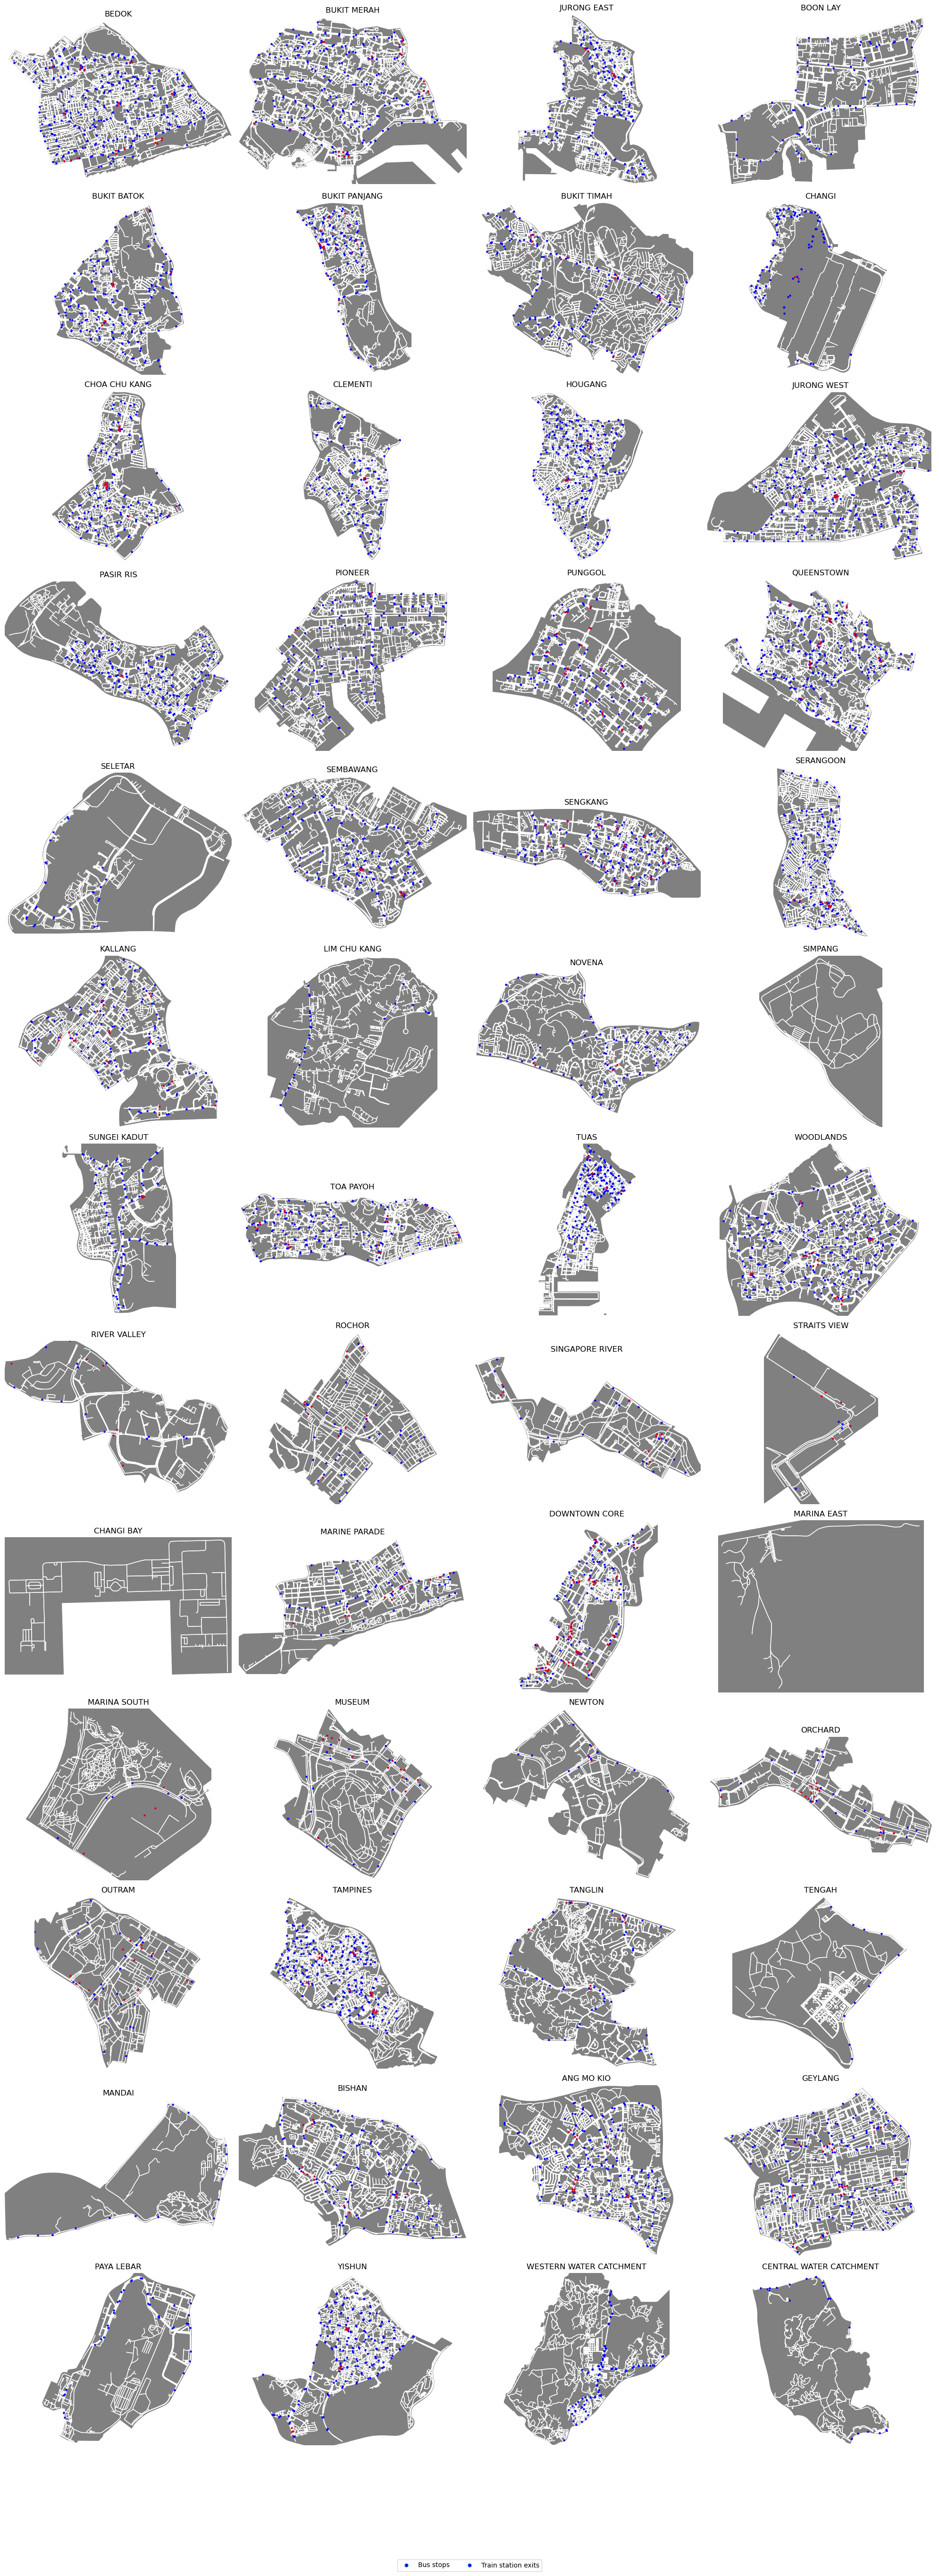

In [191]:
# # save walking network
save_dir = os.path.join(os.getcwd(),"data")
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Exclude the islands
SG_PA = planningArea_shp[~planningArea_shp['PLN_AREA_N'].str.contains("ISLAND")]
SG_PA = SG_PA.reset_index()
N_graphs = SG_PA.shape[0]
ncols = 4
nrows = N_graphs//ncols
fig, axes = plt.subplots(nrows,ncols,figsize=(ncols*5,nrows*4))
for i,ax in enumerate(axes.flatten()):
    place = SG_PA.loc[i,'PLN_AREA_N']
    filename = f"walk_network_{place}.graphml"
    filepath=os.path.join(save_dir,filename)
    if os.path.exists(filepath):
        # load graph from disk
        G_pa = ox.load_graphml(filepath)
        try:
            # plot on ax
            plot_walking_busstop(G=G_pa,bus_stops_df=busStops, 
                                 train_exits_df=trainStationExit,
                                planning_area_df=SG_PA.iloc[[i],:], 
                                ax = ax)
        except Exception as e:
            print(f'{place} Error: {e}')

lines = [
        Line2D([0], [0], linestyle="none", marker="o", markersize=5, markerfacecolor=t.get_facecolor())
        for t in axes[0,0].collections[1:]
    ]
labels = [t.get_label() for t in axes[0,0].collections[1:]]
fig.legend(lines, labels, bbox_to_anchor = (0.5,-0.05), loc = 'lower center',ncol = len(lines))
plt.tight_layout()
fp_save = os.path.join(save_dir,"planningArea_walking_busstops.png")
plt.savefig(fp_save, bbox_inches = 'tight')
plt.show()

In [ ]:
network_type = "walk"
# # Exclude the islands
SG_PA = planningArea_shp[~planningArea_shp['PLN_AREA_N'].str.contains("ISLAND")]
SG_PA = SG_PA.reset_index()
N_graphs = SG_PA.shape[0]
ncols = 4
nrows = N_graphs//ncols
fig, axes = plt.subplots(nrows,ncols,figsize=(ncols*5,nrows*4))
for i,ax in enumerate(axes.flatten()):
    try:
        G_pa = ox.graph_from_polygon(SG_PA.loc[i,"geometry"], 
                                    network_type=network_type,
                                    )
        # plot on ax
        plot_walking_busstop(G=G_pa,bus_stops_df=busStops, 
                            planning_area_df=SG_PA.iloc[[i],:], 
                            ax = ax)
    except Exception as e:
        print(f'Error: {e}')

lines = [
        Line2D([0], [0], linestyle="none", marker="o", markersize=5, markerfacecolor=t.get_facecolor())
        for t in axes[0,0].collections[1:]
    ]
labels = [t.get_label() for t in axes[0,0].collections[1:]]
fig.legend(lines, labels, bbox_to_anchor = (0.5,-0.05), loc = 'lower center',ncol = len(lines))
plt.tight_layout()
fp_save = os.path.join(os.getcwd(),"data","planningArea_walking_busstops.png")
plt.savefig(fp_save, bbox_inches = 'tight')
plt.show()